In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

torch.__version__

'2.3.1+cu121'

In [2]:
start = 0
end = 1
step = 0.02
w = 0.7
b = 0.3
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = w * X + b
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
#training and testing data split
split = int(len(X)*0.8)
train_X = X[:split]
train_y = y[:split]
test_X = X[split:]
test_y = y[split:]

In [4]:
len(train_X), len(test_X), len(train_y), len(test_y)

(40, 10, 40, 10)

In [5]:
def plt_predictions(train_X = train_X, train_y = train_y, test_X = test_X, test_y = test_y, predictions=None):
  plt.scatter(train_X, train_y, c='b', s=4, label='Training data')
  plt.scatter(test_X, test_y, c='g', s=4, label = 'Test data')
  if predictions is not None:
    plt.scatter(test_X, predictions, c='r', s=4, label='Predictions')
  plt.legend()

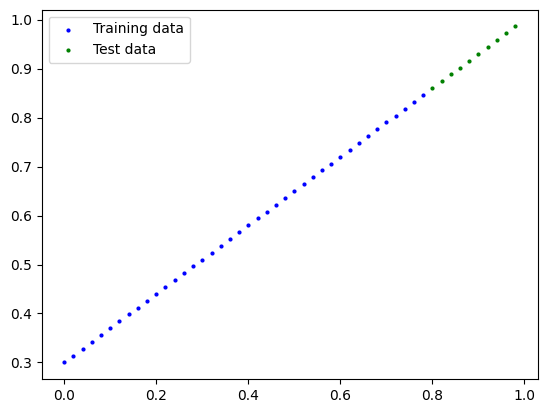

In [6]:
plt_predictions()

In [7]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.w = nn.Parameter(torch.randn(1,dtype = float),  requires_grad=True)
    self.b = nn.Parameter(torch.randn(1,dtype = float), requires_grad = True)

  def forward(self, x):
    return self.w * x + self.b

In [8]:
torch.manual_seed(42)
model0 = LinearRegressionModel()
list(model0.parameters())

[Parameter containing:
 tensor([0.3367], dtype=torch.float64, requires_grad=True),
 Parameter containing:
 tensor([0.1288], dtype=torch.float64, requires_grad=True)]

In [9]:
model0.state_dict()

OrderedDict([('w', tensor([0.3367], dtype=torch.float64)),
             ('b', tensor([0.1288], dtype=torch.float64))])

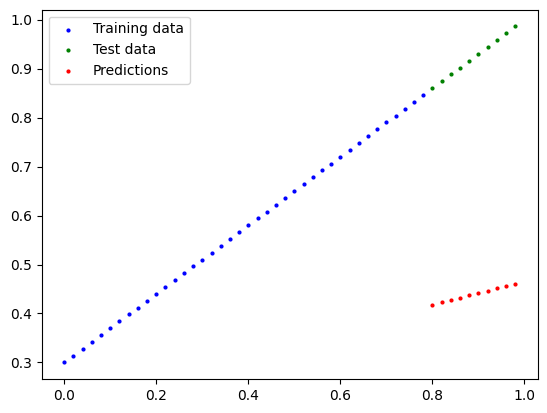

In [10]:
with torch.inference_mode():
  y_preds = model0(test_y)
  plt_predictions(predictions=y_preds)

In [11]:
print(f"no.of samples: {len(test_X)}")
print(f"no.of predctions made:{len(y_preds)}")
print(f"predexted: { y_preds}")

no.of samples: 10
no.of predctions made:10
predexted: tensor([[0.4184],
        [0.4231],
        [0.4278],
        [0.4325],
        [0.4372],
        [0.4419],
        [0.4466],
        [0.4514],
        [0.4561],
        [0.4608]], dtype=torch.float64)


In [12]:
test_y - y_preds

tensor([[0.4416],
        [0.4509],
        [0.4602],
        [0.4695],
        [0.4788],
        [0.4881],
        [0.4974],
        [0.5066],
        [0.5159],
        [0.5252]], dtype=torch.float64)

In [13]:
lossFn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model0.parameters(), lr = 0.01)

In [14]:
torch.manual_seed(42)

epoches = 100
train_loses = []
test_loses = []

for epoch in range(epoches):

  model0.train()
  y_pred = model0(train_X)
  loss = lossFn(y_pred, train_y)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model0.eval()
  with torch.inference_mode():

      y_pred = model0(test_y)
      Loss = lossFn(y_pred, test_y)
      if epoch % 10 == 0:
        train_loses.append(loss.detach().numpy())
        test_loses.append(Loss.detach().numpy())
        print(f"epoch: {epoch} | loss: {loss} | test_loss: {Loss}")

epoch: 0 | loss: 0.31288135683755547 | test_loss: 0.4698257030305223
epoch: 10 | loss: 0.1976713574739093 | test_loss: 0.33382870347669635
epoch: 20 | loss: 0.08908721056311557 | test_loss: 0.2034886139207007
epoch: 30 | loss: 0.05314849742260115 | test_loss: 0.12975113433881155
epoch: 40 | loss: 0.04543793101588776 | test_loss: 0.0979406446421168
epoch: 50 | loss: 0.041678606478126046 | test_loss: 0.08290364493618745
epoch: 60 | loss: 0.03818929484512264 | test_loss: 0.07198347524748025
epoch: 70 | loss: 0.03476085499350197 | test_loss: 0.06314479554557476
epoch: 80 | loss: 0.031323806993240874 | test_loss: 0.05430611584366929
epoch: 90 | loss: 0.02788736528831538 | test_loss: 0.04616126613736443


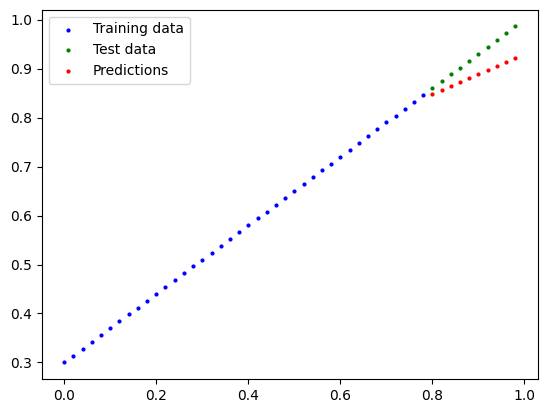

In [15]:
plt_predictions(predictions =y_pred)

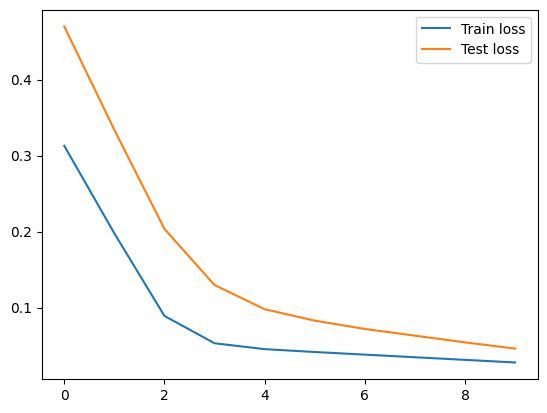

In [16]:
#ploting loss curves
plt.plot(train_loses, label='Train loss')
plt.plot(test_loses, label='Test loss')
plt.legend()

In [17]:
print("model state: ", model0.state_dict())
print(f"w: {w}")
print(f"b: {b}")

model state:  OrderedDict([('w', tensor([0.5784], dtype=torch.float64)), ('b', tensor([0.3513], dtype=torch.float64))])
w: 0.7
b: 0.3


In [18]:
epchos = 200
torch.manual_seed(42)

for epoch in range(epchos):

  #training
  model0.train()
  y_pred = model0(train_X)
  train_loss = lossFn(y_pred, train_y)
  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()

  #testing
  model0.eval()

  with torch.inference_mode():
    y_pred_test = model0(test_X)
    test_Loss = lossFn(y_pred_test, test_y)
    if epoch % 10 == 0:
      print(f"epoch: {epoch} | train_loss: {train_loss} | test_loss: {test_Loss}")
      train_loses.append(train_loss.detach().numpy())
      test_loses.append(test_Loss.detach().numpy())


epoch: 0 | train_loss: 0.024458925436694718 | test_loss: 0.056463586970313374
epoch: 10 | train_loss: 0.021020207499473125 | test_loss: 0.04819118722428421
epoch: 20 | train_loss: 0.01758543573150812 | test_loss: 0.0406056874744225
epoch: 30 | train_loss: 0.014155407836221082 | test_loss: 0.032333287728393355
epoch: 40 | train_loss: 0.01071660800570538 | test_loss: 0.0240608879823642
epoch: 50 | train_loss: 0.007283506174700874 | test_loss: 0.016475388232502497
epoch: 60 | train_loss: 0.003851808342453336 | test_loss: 0.008202988486473361
epoch: 70 | train_loss: 0.008931236682358016 | test_loss: 0.005024588669596586
epoch: 80 | train_loss: 0.008931236682358016 | test_loss: 0.005024588669596586
epoch: 90 | train_loss: 0.008931236682358016 | test_loss: 0.005024588669596586
epoch: 100 | train_loss: 0.008931236682358016 | test_loss: 0.005024588669596586
epoch: 110 | train_loss: 0.008931236682358016 | test_loss: 0.005024588669596586
epoch: 120 | train_loss: 0.008931236682358016 | test_loss:

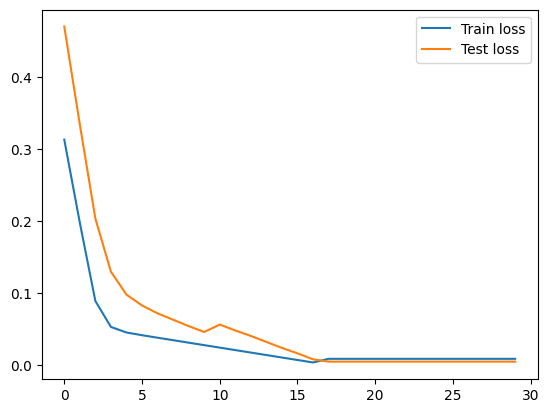

In [19]:
plt.plot(train_loses, label='Train loss')
plt.plot(test_loses, label='Test loss')
plt.legend()

In [20]:
print(f"original data:", model0.state_dict())
print(f"w: {w}")
print(f"b: {b}")

original data: OrderedDict([('w', tensor([0.6990], dtype=torch.float64)), ('b', tensor([0.3093], dtype=torch.float64))])
w: 0.7
b: 0.3


In [21]:
print("Waw")

Waw


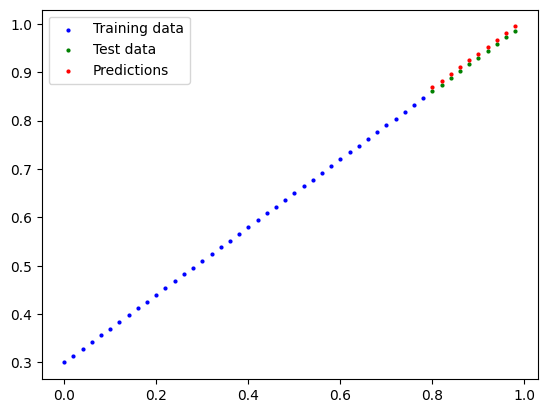

In [22]:
plt_predictions(predictions=y_pred_test)

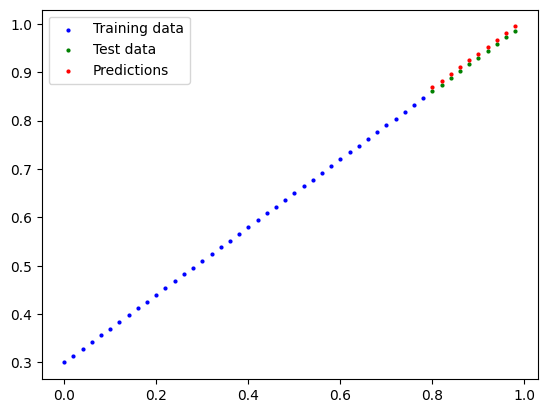

In [23]:
model0.eval()

with torch.inference_mode():
  y_pred = model0(test_X)
  plt_predictions(predictions=y_pred)

In [24]:
from pathlib import Path

In [25]:
MODEL_PATH = Path("model")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

In [26]:
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
# torch.save(obj = model0.state_dict(), f=MODEL_PATH)

In [27]:
import os
print(os.getcwd())
from google.colab import drive
drive.mount('/content/drive')

/content
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
torch.save(obj = model0.state_dict(), f = MODEL_SAVE_PATH)

In [29]:
load_model0 = LinearRegressionModel()
load_model0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

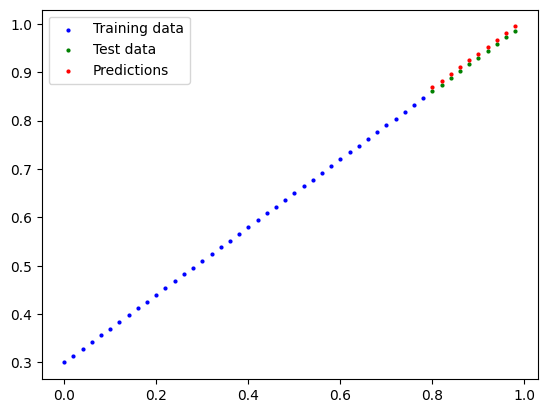

In [30]:
load_model0.eval()
with torch.inference_mode():
  y_pred_load = load_model0(test_X)
  plt_predictions(predictions=y_pred_load)